# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
CombinedData = pd.DataFrame.merge(study_results,mouse_metadata,how="left",on="Mouse ID")
# Display the data table for preview
CombinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
NumberOfMice = len(CombinedData["Mouse ID"].value_counts())
NumberOfMice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
DupedMouseId = np.array(CombinedData[CombinedData.duplicated()]['Mouse ID'])
DupedMouseId

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
for id in DupedMouseId:
    duplicates = CombinedData.loc[CombinedData['Mouse ID']==id]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanedData =pd.DataFrame()
for id in DupedMouseId:
    CleanedData = CombinedData[CombinedData['Mouse ID'] != id]
CleanedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
NumberOfMiceClean = CleanedData["Mouse ID"].nunique()
NumberOfMiceClean

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
SummaryStats = pd.DataFrame()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
SummaryStats['Mean Tumor Volume'] = CleanedData.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
SummaryStats['Median Tumor Volume'] = CleanedData.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
SummaryStats['Tumor Volume Variance'] = CleanedData.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
SummaryStats['Tumor Volume Std. Dev.'] = CleanedData.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
SummaryStats['Tumor Volume Std. Err.'] = CleanedData.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

SummaryStats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
means = CleanedData.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
means = means.rename('mean')
medians = CleanedData.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
medians = medians.rename('median')
variances = CleanedData.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
variances = variances.rename('var')
stds = CleanedData.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
stds = stds.rename('std')
sems = CleanedData.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
sems = sems.rename('sem')
# Using the aggregation method, produce the same summary statistics in a single line
SummaryStatsCombined = pd.concat([means,medians,variances,stds,sems],axis=1)
SummaryStatsCombined


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

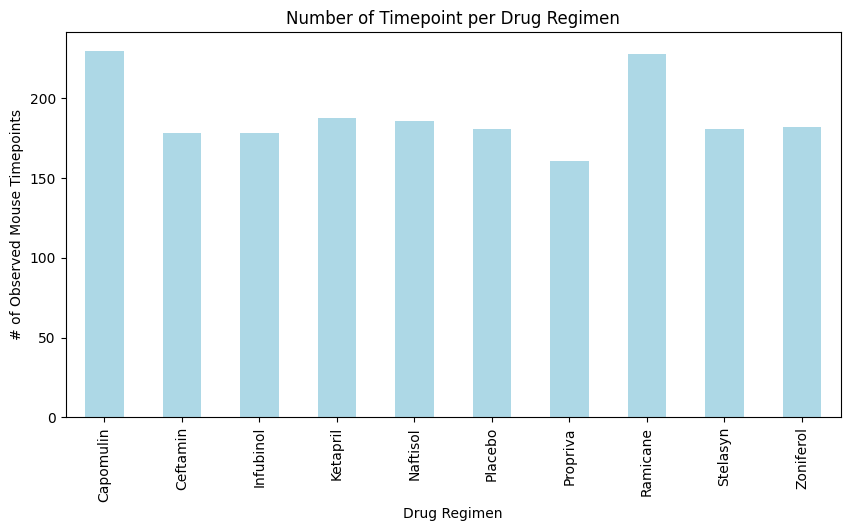

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
TimePointMouse = CombinedData.groupby('Drug Regimen')['Timepoint'].count()
TimePointMouse.plot(kind='bar', figsize=(10, 5), color='lightblue')
plt.title("Number of Timepoint per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



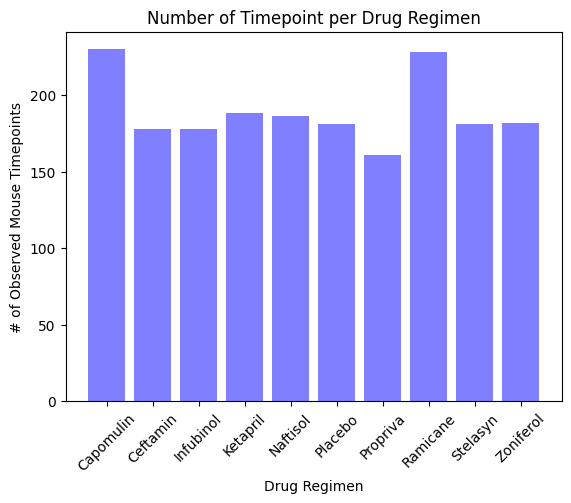

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
TimePointMouse = CombinedData.groupby('Drug Regimen')['Timepoint'].count()
plt.bar(TimePointMouse.index, TimePointMouse.values, color='blue', alpha=.5)
plt.title("Number of Timepoint per Drug Regimen")
plt.xticks(rotation = 45)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

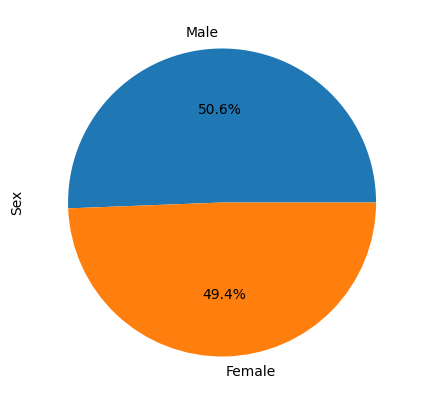

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
SexDistribution = CombinedData["Sex"].value_counts()

PieGraphSex = SexDistribution.plot.pie(x='Sex',autopct='%1.1f%%',figsize=(5,5))
PieGraphSex

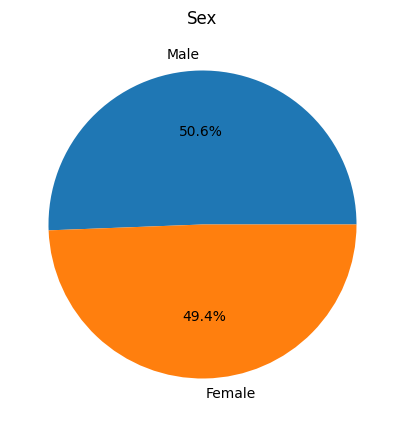

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(SexDistribution,labels=SexDistribution.index,autopct='%1.1f%%')
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

GreatestTimepoints = CleanedData.groupby(["Mouse ID"]).max()["Timepoint"].to_frame()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
CleanedDataMax = pd.DataFrame.merge(GreatestTimepoints,CleanedData,how='inner',on=["Mouse ID","Timepoint"])

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
TumorVolumesData = []
TumorIQR= []
Tomurq3s =[]
Tumorq1s = []

        
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volume"
    TumorVolFin = CleanedDataMax[CleanedDataMax["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    TumorVolFin = TumorVolFin.to_list()
    # add subset 
    TumorVolumesData.append(TumorVolFin)
    
    # Determine outliers using upper and lower bounds
    ThirdQuartile = np.percentile(TumorVolFin,75)
    FirstQuartile = np.percentile(TumorVolFin,25)
    IQR = ThirdQuartile - FirstQuartile
    LowerBound = FirstQuartile - (1.5 * IQR)
    UpperBound = FirstQuartile + (1.5 * IQR)
    DrugOutliers = [x if (x < LowerBound) or (x > UpperBound) else '' for x in TumorVolFin]
    DrugOutliers = [x for x in DrugOutliers if x]
    print(f"Outliers for {treatment}:")
    print(DrugOutliers,"\n")

Outliers for Capomulin:
[47.68596303, 46.53920617] 

Outliers for Ramicane:
[45.22086888] 

Outliers for Infubinol:
[72.2267309, 36.3213458] 

Outliers for Ceftamin:
[] 



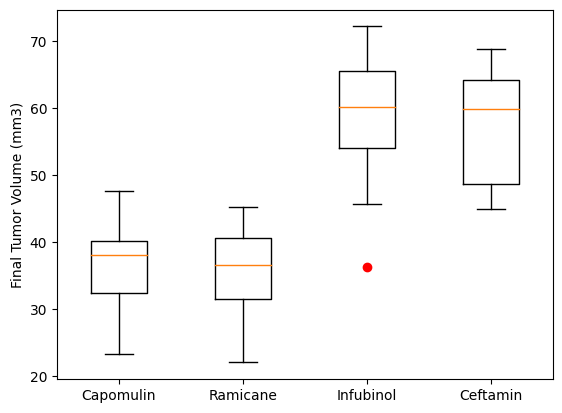

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(TumorVolumesData,labels=treatments,sym="r")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

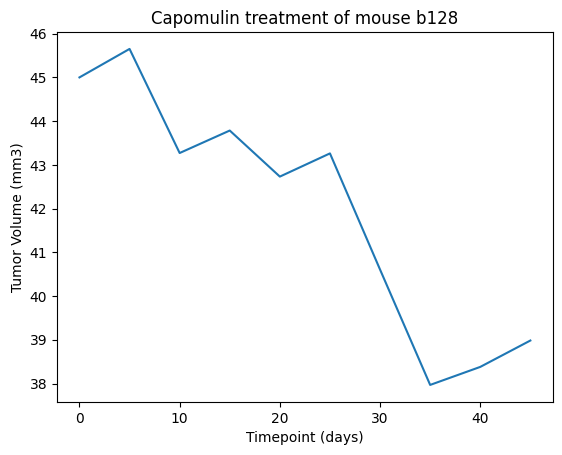

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
MouseId = 'b128'
XTimepoint = CleanedData[CleanedData["Mouse ID"]==MouseId]
XTimepoint = XTimepoint.filter(['Timepoint','Tumor Volume (mm3)'], axis=1)
plt.plot(XTimepoint["Timepoint"],XTimepoint["Tumor Volume (mm3)"],linestyle="solid")
plt.title("Capomulin treatment of mouse b128")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

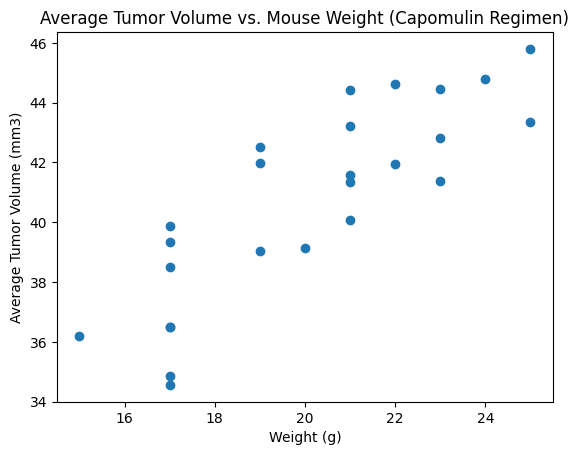

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
CapomulinReg = CombinedData[CombinedData["Drug Regimen"] == "Capomulin"]
CapomulinRegGrouped = CapomulinReg.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"})
timepoints = CombinedData["Timepoint"]
tumorvolumes = CombinedData["Tumor Volume (mm3)"]
plt.scatter(CapomulinRegGrouped["Weight (g)"], CapomulinRegGrouped["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and a linear regression model 
slope, intercept, r_value, p_value, std_err = st.linregress(CapomulinRegGrouped['Weight'],CapomulinRegGrouped['Tumor Volume Average'])
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print("The correlation between mouse weight and the average tumor volume is " + str(round(r_value,2)))
plt.scatter(CapomulinRegGrouped['Weight'],CapomulinRegGrouped['Tumor Volume Average'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

line_fit = slope * CapomulinRegGrouped['Weight'] + intercept
plt.plot(CapomulinRegGrouped['Weight'],line_fit,"--",color='r')
plt.show()

KeyError: 'Weight'